<a href="https://colab.research.google.com/github/kodooraKILLER/CWSM/blob/master/Chennai_Water_Storage_Manager.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chennai Water Storage Manager**
------
*Notebook for TARP project collaborated by Senthil Kumar and Somya Sheti*


## **STEP ZERO: IMPORT LIBRARIES AND MINE DATA**
-------
- Import necessary libraries
- Web-scrap data

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from keras import layers
from keras import optimizers
import io
from sklearn.model_selection import KFold

print('necessary libraries imported')

necessary libraries imported


In [ ]:
# Mining data from the website



# Writing to an excel  
# sheet using Python 
import xlwt 
from xlwt import Workbook 
  
# Workbook is created 
wb = Workbook() 
  
# add_sheet is used to create sheet. 
sheet1 = wb.add_sheet('Main_sheet') 
  
sheet1.write(0, 0, 'Date')
sheet1.write(0, 1, 'nth day in year')
 
sheet1.write(0, 2, 'Storage (mcft)') 
sheet1.write(0, 3, 'Inflow (cusecs)') 
sheet1.write(0, 4, 'Rainfall (mm)') 
sheet1.write(0, 5, 'Outflow (cusecs)')
sheet1.write(0,6, 'Reservoir')
 
required_td=[14,15,17,16,23,24,26,25,32,33,35,34,50,51,53,52]
content=''
controller=1
 
import requests
#with open('C:\Users\R. Senthil Kumar\AppData\Local\Programs\Python\Python38-32\content.txt', 'r') as content_file:
  #  content = content_file.read()
from datetime import datetime  
from datetime import timedelta  
def findoccurence(n):
    global content
    position=0
    for i in range(0,n):
        temp=content[content.find('<td ',position):content.find('</td>',position)]
        #print(temp)
        temp=temp[temp.rfind('>',0,temp.find('</font>')-1)+1:temp.find('</font>')]
        #(temp)
        
        position=content.find('</td>',position)+1
    try:
      float(temp)
      return temp
    except:
      return -1
 
 
sdate=input('Enter starting date in dd/mm/yyyy format: ')
edate=input('Enter ending date in dd/mm/yyyy format: ')
x=datetime.strptime(sdate,'%d/%m/%Y')
y=datetime.strptime(edate,'%d/%m/%Y')
y+=timedelta(days=1)
edate=y.strftime("%d")+'/'+y.strftime("%m")+'/'+y.strftime("%Y")
stringer=x.strftime("%d")+'/'+x.strftime("%m")+'/'+x.strftime("%Y")
print('Deploying SPYder, please wait...\n(do not disconnect the net-connection or abort the process)\n')
while(stringer!=edate):
    print('current SPYder rezendevous: '+stringer)
    diff=(x-datetime(int(x.strftime("%Y")),1,1)).days
    sheet1.write(controller,0,stringer)
    sheet1.write(controller,1,diff)
    pointer=2
    parameters = {'ldate':stringer}
    r = requests.post('http://123.63.203.150/reserve.asp', data=parameters)
    content=r.text
    origin=1
    for i in required_td:
        #print(controller,pointer,float(findoccurence(i)))
        sheet1.write(controller,pointer,float(findoccurence(i)))
        pointer+=1
        if((pointer-1)%5==0):
            sheet1.write(controller,pointer,origin)
            origin+=1
            if(origin==5):
                break
            else:
                controller+=1
                sheet1.write(controller,0,stringer)
                sheet1.write(controller,1,diff)
                pointer=2
        
    x+=timedelta(days=1)
    stringer=x.strftime("%d")+'/'+x.strftime("%m")+'/'+x.strftime("%Y")
    controller+=1
 
wb.save('reservoir_new.xls')
print('SPYder deploy success, please open reservoir.xls sheet in your local folder\n')


Enter starting date in dd/mm/yyyy format: 10/04/2004
Enter ending date in dd/mm/yyyy format: 12/04/2004
Deploying SPYder, please wait...
(do not disconnect the net-connection or abort the process)

current SPYder rezendevous: 10/04/2004
current SPYder rezendevous: 11/04/2004
current SPYder rezendevous: 12/04/2004
SPYder deploy success, please open reservoir.xls sheet in your local folder



In [ ]:
dictionary={
    'Chembarambaakam':0,
    'Chozhavaram':1,
    'Poondi':2,
    'RedHills':3
}
revdict={
   
    0:'Chembarambaakam',
    1:'Chozhavaram',
    2:'Poondi',
    3:'RedHills'
}
dianna=[]
    
dianna.append(pd.read_csv('./CHdianna2.csv',na_values=-1))
dianna.append(pd.read_csv('./CZdianna2.csv',na_values=-1))
dianna.append(pd.read_csv('./PNdianna2.csv',na_values=-1))
dianna.append(pd.read_csv('./RHdianna2.csv',na_values=-1))
for i in range(0,4):
    print('\n',revdict[i],':\n')
    dianna[i]=dianna[i].dropna()
    dianna[i]=dianna[i].reset_index(drop=True)
    print(dianna[i].tail())


 Chembarambaakam :

            Date  nth day in year  ...  Rainfall (mm)  Outflow (cusecs)
5811  27/12/2019              360  ...            0.0              67.0
5812  28/12/2019              361  ...            0.0              67.0
5813  29/12/2019              362  ...            0.0              67.0
5814  30/12/2019              363  ...            0.0              67.0
5815  31/12/2019              364  ...           13.0              67.0

[5 rows x 6 columns]

 Chozhavaram :

            Date  nth day in year  ...  Rainfall (mm)  Outflow (cusecs)
5821  27/12/2019              360  ...            0.0              75.0
5822  28/12/2019              361  ...            0.0              70.0
5823  29/12/2019              362  ...            0.0              35.0
5824  30/12/2019              363  ...           14.0              23.0
5825  31/12/2019              364  ...            4.0              12.0

[5 rows x 6 columns]

 Poondi :

            Date  nth day in year  ...  Ra

## **STEP ONE**: Exploratory Data Analysis
------


In [ ]:
print('EDA')

EDA


## **STEP TWO**: Data Cleaning
-------

In [ ]:
print('data cleaning')

data cleaning


## **STEP THREE**: Feature engineering
-------

In [ ]:
LOOKBACK=14
LOOKFRONT=7

In [ ]:
#MIN-MAX NORMALISATION
def normaliser(data,ij):
                              siro=data.drop(columns=['Date'])
                              '''for i in ['Storage (mcft)', 'Inflow (cusecs)','Rainfall (mm)','Outflow (cusecs)']:
                                siro[i]-=min(dianna[ij][i])
                                siro[i]/=(max(dianna[ij][i])-min(dianna[ij][i]))'''
                              return siro
  



    


#N-DAY SEQUENCE FOR NEURAL NET
def sequence_prepare(raw,lookback=5,lookfront=1):
                                          sequence=np.zeros(((len(raw)-lookback),lookback,raw.shape[-1]))
                                          target=np.zeros(len(raw)-lookback)

                                          for i in range(lookback, len(raw)-lookfront):
                                              for j in range(0,lookback):
                                                  sequence[i-lookback][j]=raw.loc[i+j-lookback,:]
                                              target[i-lookback]=raw['Storage (mcft)'][i+lookfront]

                                          return sequence,target

def op_re_normaliser(var,ij):
              var*=(max(dianna[ij]['Storage (mcft)'])-min(dianna[ij]['Storage (mcft)']))
              var+=min(dianna[ij]['Storage (mcft)'])
              return var
            

siro=[]
sequence=[]
target=[]

for i in range(0,4):
    print(revdict[i])
    siro.append(normaliser(dianna[i],i))
    print(siro[i].describe())

    sequ,targ=sequence_prepare(siro[i],LOOKBACK,LOOKFRONT)
    sequence.append(sequ)
    target.append(targ)  

TOTAL_DATES=5810-LOOKBACK

for i in range(0,4):
     sequence[i]=sequence[i][:TOTAL_DATES]
     target[i]=target[i][:TOTAL_DATES]
     
     print(sequence[i].shape,
        target[i].shape)

Chembarambaakam
       nth day in year  Storage (mcft)  ...  Rainfall (mm)  Outflow (cusecs)
count      5816.000000     5816.000000  ...    5816.000000       5816.000000
mean        182.133769     1287.078258  ...       4.000181        114.489168
std         105.470060      964.618205  ...      16.230441        599.118040
min           0.000000        0.000000  ...       0.000000          0.000000
25%          91.000000      408.000000  ...       0.000000         35.000000
50%         182.000000     1193.000000  ...       0.000000         78.000000
75%         274.000000     2047.000000  ...       0.000000        117.000000
max         365.000000     3396.000000  ...     475.000000      29000.000000

[8 rows x 5 columns]
Chozhavaram
       nth day in year  Storage (mcft)  ...  Rainfall (mm)  Outflow (cusecs)
count      5826.000000     5826.000000  ...    5826.000000       5826.000000
mean        182.239787      234.387945  ...       3.768314         18.927051
std         105.397390    

## **STEP FOUR**: Brain Building
-------

### **PIPELINE ONE**: LSTM network

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import layers

#model.add(layers.Reshape((1,5,4)))
#model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(layers.Flatten())`

xin=[]
lstm=[]
cnnraw=[]
cnn=[]
x=[]
xout=[]
for i in range(0,4):
    xin.append(layers.Input(shape=(LOOKBACK,5),name=('Input'+str(i))))
    lstm.append(layers.LSTM(16,
                            dropout=0.1,
                            recurrent_dropout=0.5,
                            activation='relu',
                            #return_sequences=True,
                            #input_shape=(5,4)
                         name=('LSTM'+str(i)))(xin[i]))
    xout.append(layers.Dense(1,name=('out'+str(i)))(lstm[i]))

                
model=models.Model(inputs=xin,outputs=xout)
model.compile(loss='mae', optimizer=optimizers.Adam())
model.summary()

print('all done')

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input0 (InputLayer)             [(None, 14, 5)]      0                                            
__________________________________________________________________________________________________
Input1 (InputLayer)             [(None, 14, 5)]      0                                            
__________________________________________________________________________________________________
Input2 (InputLayer)             [(None, 14, 5)]      0                                            
__________________________________________________________________________________________________
Input3 (InputLayer)             [(None, 14, 5)]      0                                            
____________________________________________________________________________________________

In [ ]:
fold=0
history=[]
for train_index, test_index in KFold(3,shuffle=True).split(sequence[0]):
    print(' Fold ',fold+1)
    x_train=[]
    x_val=[]
    y_train=[]
    y_val=[]
    for i in range(0,4):
      x_train.append(sequence[i][train_index])
      x_val.append(sequence[i][test_index])
      y_train.append(target[i][train_index])
      y_val.append(target[i][test_index])
    history.append(model.fit(x_train, y_train, 
                    epochs=100, 
                    batch_size=500, 
                    validation_data=(x_val, y_val)))

 Fold  1
Epoch 1/100
8/8 [==============================] - 14s 528ms/step - loss: 5449.6445 - out0_loss: 1811.4379 - out1_loss: 411.5677 - out2_loss: 1656.3237 - out3_loss: 1570.3159 - val_loss: 5542.5835 - val_out0_loss: 2051.1265 - val_out1_loss: 382.0783 - val_out2_loss: 1553.8678 - val_out3_loss: 1555.5104
Epoch 2/100
8/8 [==============================] - 3s 365ms/step - loss: 5122.5132 - out0_loss: 1668.6425 - out1_loss: 396.8965 - out2_loss: 1538.3840 - out3_loss: 1518.5901 - val_loss: 5385.3813 - val_out0_loss: 2035.6050 - val_out1_loss: 332.3893 - val_out2_loss: 1473.6321 - val_out3_loss: 1543.7549
Epoch 3/100
8/8 [==============================] - 3s 379ms/step - loss: 4895.7271 - out0_loss: 1583.5519 - out1_loss: 377.9615 - out2_loss: 1433.8358 - out3_loss: 1500.3776 - val_loss: 5247.6133 - val_out0_loss: 1976.6034 - val_out1_loss: 317.5120 - val_out2_loss: 1424.4855 - val_out3_loss: 1529.0121
Epoch 4/100
8/8 [==============================] - 3s 363ms/step - loss: 4716.421

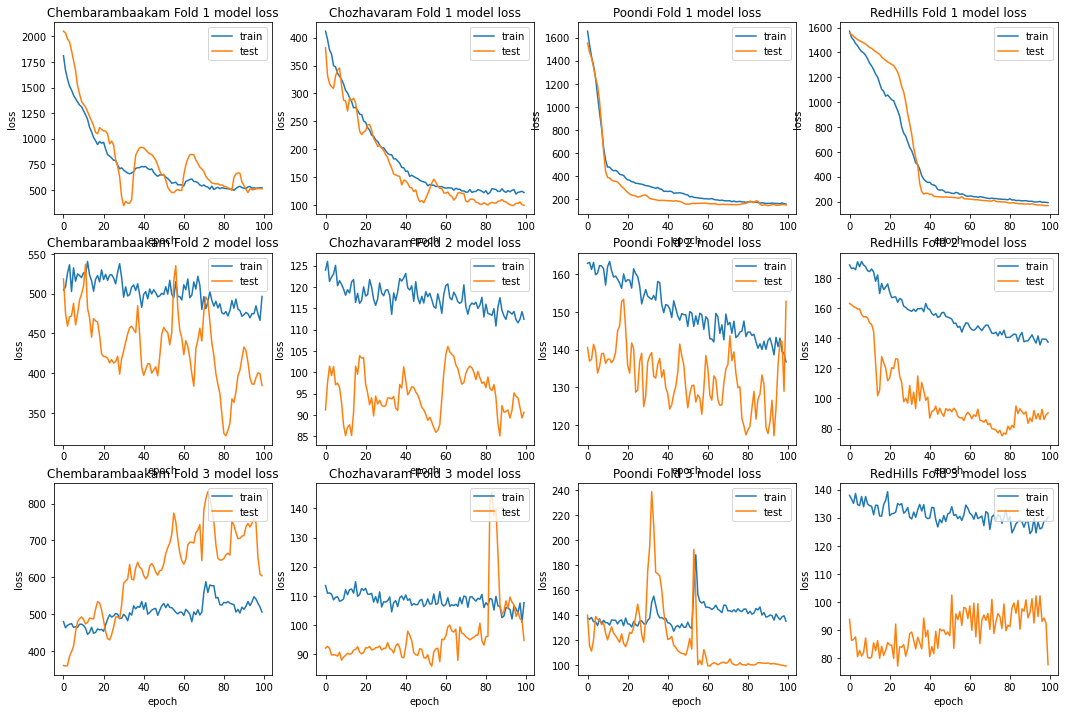

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 4, figsize=(18,12))
for fold in range(0,3):
  for ij in range(0,4):

    axes[fold][ij].plot(history[fold].history['out'+str(ij)+'_loss'])
    axes[fold][ij].plot(history[fold].history['val_out'+str(ij)+'_loss'])
    axes[fold][ij].set_title(revdict[ij]+' Fold '+str(fold+1)+' model loss')
    axes[fold][ij].set_ylabel('loss') 
    axes[fold][ij].set_xlabel('epoch')
    
    axes[fold][ij].legend(['train', 'test'], loc='upper right')
fig.show()


### **PIPELINE TWO**: CNN network

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import layers

#model.add(layers.Reshape((1,5,4)))
#model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(layers.Flatten())`

xin=[]
lstm=[]
cnnraw=[]
cnn=[]
x=[]
xout=[]
for i in range(0,4):
    xin.append(layers.Input(shape=(LOOKBACK,5),name=('Input'+str(i))))
    cnnraw.append(layers.Conv1D(4,5,activation='relu',name=('CNN-base'+str(i)))(xin[i]))
    cnn.append(layers.Flatten(name=('CNN'+str(i)))(cnnraw[i]))
    xout.append(layers.Dense(1,name=('out'+str(i)))(cnn[i]))


                
model2=models.Model(inputs=xin,outputs=xout)
model2.compile(loss='mae', optimizer=optimizers.Adam())
model2.summary()

print('all done')

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input0 (InputLayer)             [(None, 14, 5)]      0                                            
__________________________________________________________________________________________________
Input1 (InputLayer)             [(None, 14, 5)]      0                                            
__________________________________________________________________________________________________
Input2 (InputLayer)             [(None, 14, 5)]      0                                            
__________________________________________________________________________________________________
Input3 (InputLayer)             [(None, 14, 5)]      0                                            
____________________________________________________________________________________________

In [ ]:
fold=0
history=[]
for train_index, test_index in KFold(3,shuffle=True).split(sequence[0]):
    print(' Fold ',fold+1)
    x_train=[]
    x_val=[]
    y_train=[]
    y_val=[]
    for i in range(0,4):
      x_train.append(sequence[i][train_index])
      x_val.append(sequence[i][test_index])
      y_train.append(target[i][train_index])
      y_val.append(target[i][test_index])
    history.append(model2.fit(x_train, y_train, 
                    epochs=100, 
                    batch_size=500, 
                    validation_data=(x_val, y_val)))

 Fold  1
Epoch 1/100
8/8 [==============================] - 2s 77ms/step - loss: 4235.8760 - out0_loss: 2313.6045 - out1_loss: 625.4799 - out2_loss: 851.6932 - out3_loss: 445.0985 - val_loss: 3814.3323 - val_out0_loss: 2185.3503 - val_out1_loss: 570.6754 - val_out2_loss: 730.3213 - val_out3_loss: 327.9849
Epoch 2/100
8/8 [==============================] - 0s 15ms/step - loss: 3583.0903 - out0_loss: 2073.3818 - out1_loss: 538.7808 - out2_loss: 709.3977 - out3_loss: 261.5302 - val_loss: 3236.8206 - val_out0_loss: 1957.2405 - val_out1_loss: 489.1077 - val_out2_loss: 597.9008 - val_out3_loss: 192.5716
Epoch 3/100
8/8 [==============================] - 0s 16ms/step - loss: 3069.7510 - out0_loss: 1847.5372 - out1_loss: 460.2516 - out2_loss: 569.4172 - out3_loss: 192.5450 - val_loss: 2827.0808 - val_out0_loss: 1728.2518 - val_out1_loss: 414.3499 - val_out2_loss: 474.7665 - val_out3_loss: 209.7124
Epoch 4/100
8/8 [==============================] - 0s 14ms/step - loss: 2653.2969 - out0_loss: 16

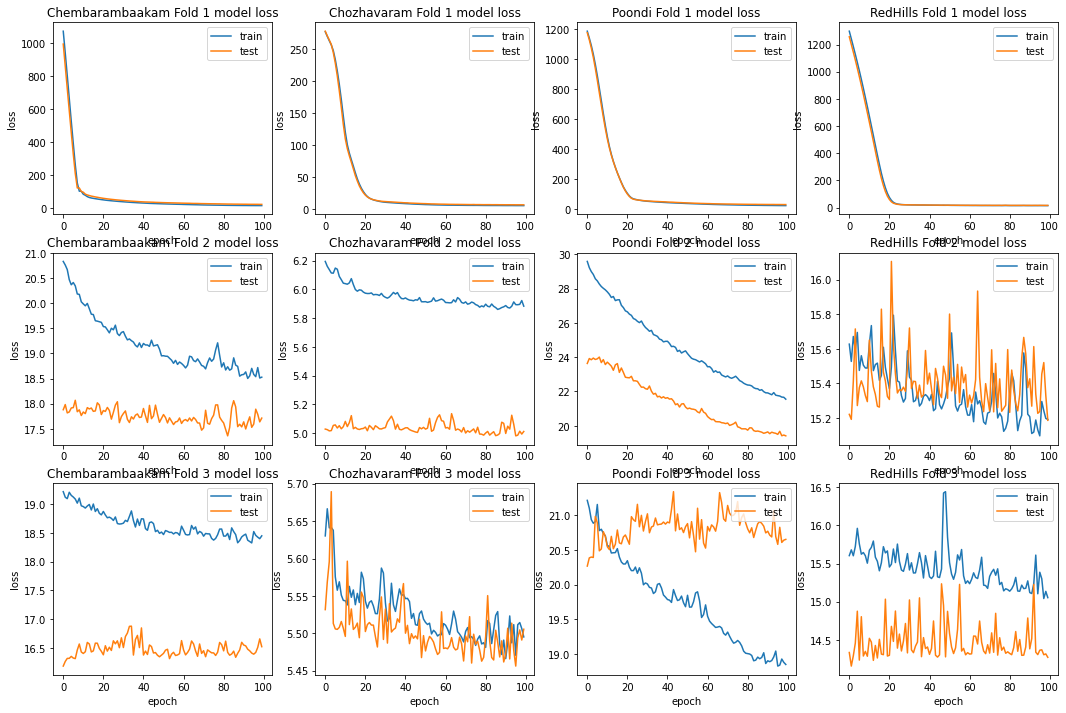

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 4, figsize=(18,12))
for fold in range(0,3):
  for ij in range(0,4):

    axes[fold][ij].plot(history[fold].history['out'+str(ij)+'_loss'])
    axes[fold][ij].plot(history[fold].history['val_out'+str(ij)+'_loss'])
    axes[fold][ij].set_title(revdict[ij]+' Fold '+str(fold+1)+' model loss')
    axes[fold][ij].set_ylabel('loss') 
    axes[fold][ij].set_xlabel('epoch')
    
    axes[fold][ij].legend(['train', 'test'], loc='upper right')
fig.show()
